**sentiment-analysis-for-mental-health/data**

https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/data



# Data Loading & Inspection

In [4]:
# bring the data in as a dataframe

import pandas as pd

# path to the data - ADJUST IF RUNNING IN NEW ENV! =)
file_path = './mh_data/raw_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


# Evaluate Missing Data

Data Shape: Rows = 53043 , Columns = 3

Missing Values by Column:
Unnamed: 0      0
statement     362
status          0
dtype: int64

Distribution of 'status' for missing 'statement':
status
Personality disorder    124
Bipolar                 100
Stress                   82
Anxiety                  47
Normal                    8
Suicidal                  1
Name: count, dtype: int64


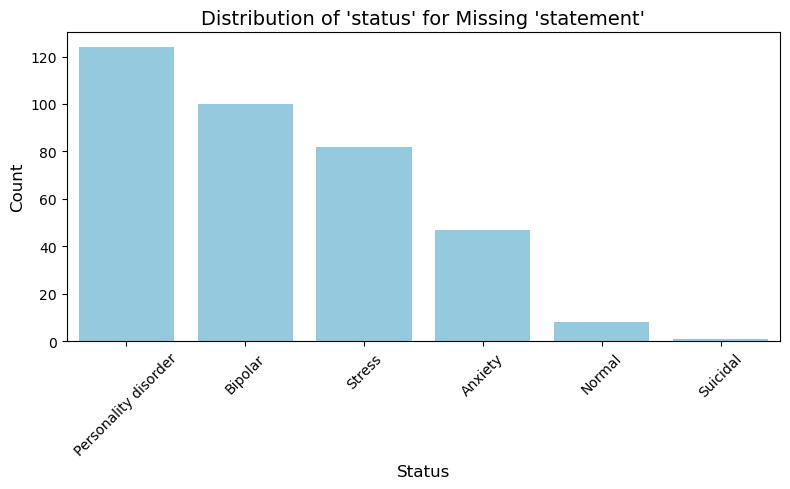

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter rows where statement column is missing
missing_statement_data = df[df['statement'].isnull()]

# calculate the distribution of status for missing statement rows
status_distribution = missing_statement_data['status'].value_counts()

# print data shape and distribution of status
print("Data Shape: Rows =", df.shape[0], ", Columns =", df.shape[1])
print("\nMissing Values by Column:")
print(df.isnull().sum())
print("\nDistribution of 'status' for missing 'statement':")
print(status_distribution)

# plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=status_distribution.index, y=status_distribution.values, color='skyblue')

# labels
plt.title("Distribution of 'status' for Missing 'statement'", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# display the plot
plt.show()


# Evaluate the Balance of Status

Data Shape: Rows = 53043 , Columns = 3

Overall Distribution of 'status':
status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

Percentages of 'status':
status
Normal                  31.0
Depression              29.0
Suicidal                20.0
Anxiety                  7.0
Bipolar                  5.0
Stress                   5.0
Personality disorder     2.0
Name: count, dtype: float64


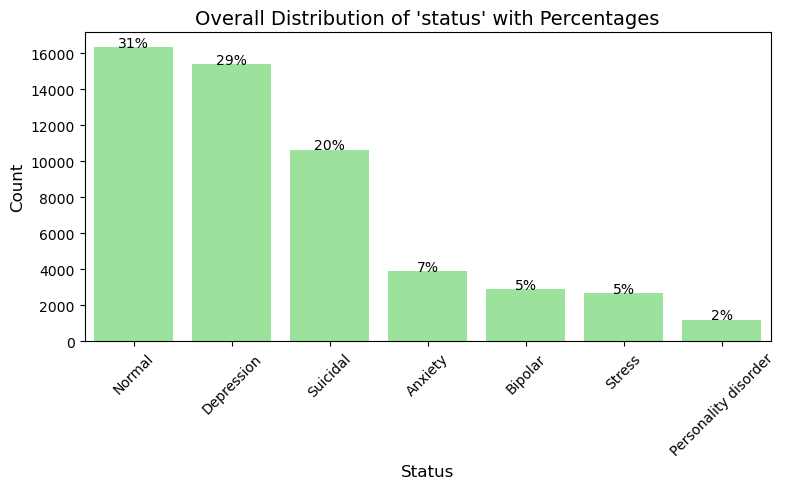

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the overall distribution of status and percentages
status_distribution_overall = df['status'].value_counts()
status_percentages = (status_distribution_overall / df.shape[0]) * 100

# print data shape and overall status distribution with percentages
print("Data Shape: Rows =", df.shape[0], ", Columns =", df.shape[1])
print("\nOverall Distribution of 'status':")
print(status_distribution_overall)
print("\nPercentages of 'status':")
print(status_percentages.round())

# plot the overall status distribution with percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=status_distribution_overall.index, y=status_distribution_overall.values, color='lightgreen')

# titles and labels
plt.title("Overall Distribution of 'status' with Percentages", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# put the percentages on the bars
for index, value in enumerate(status_distribution_overall.values):
    percentage = f"{round(status_percentages.values[index]):.0f}%"
    plt.text(index, value + 5, percentage, ha='center', fontsize=10)

plt.tight_layout()

# output
plt.show()


# Most Common Words per Category (Pre-Filtered)

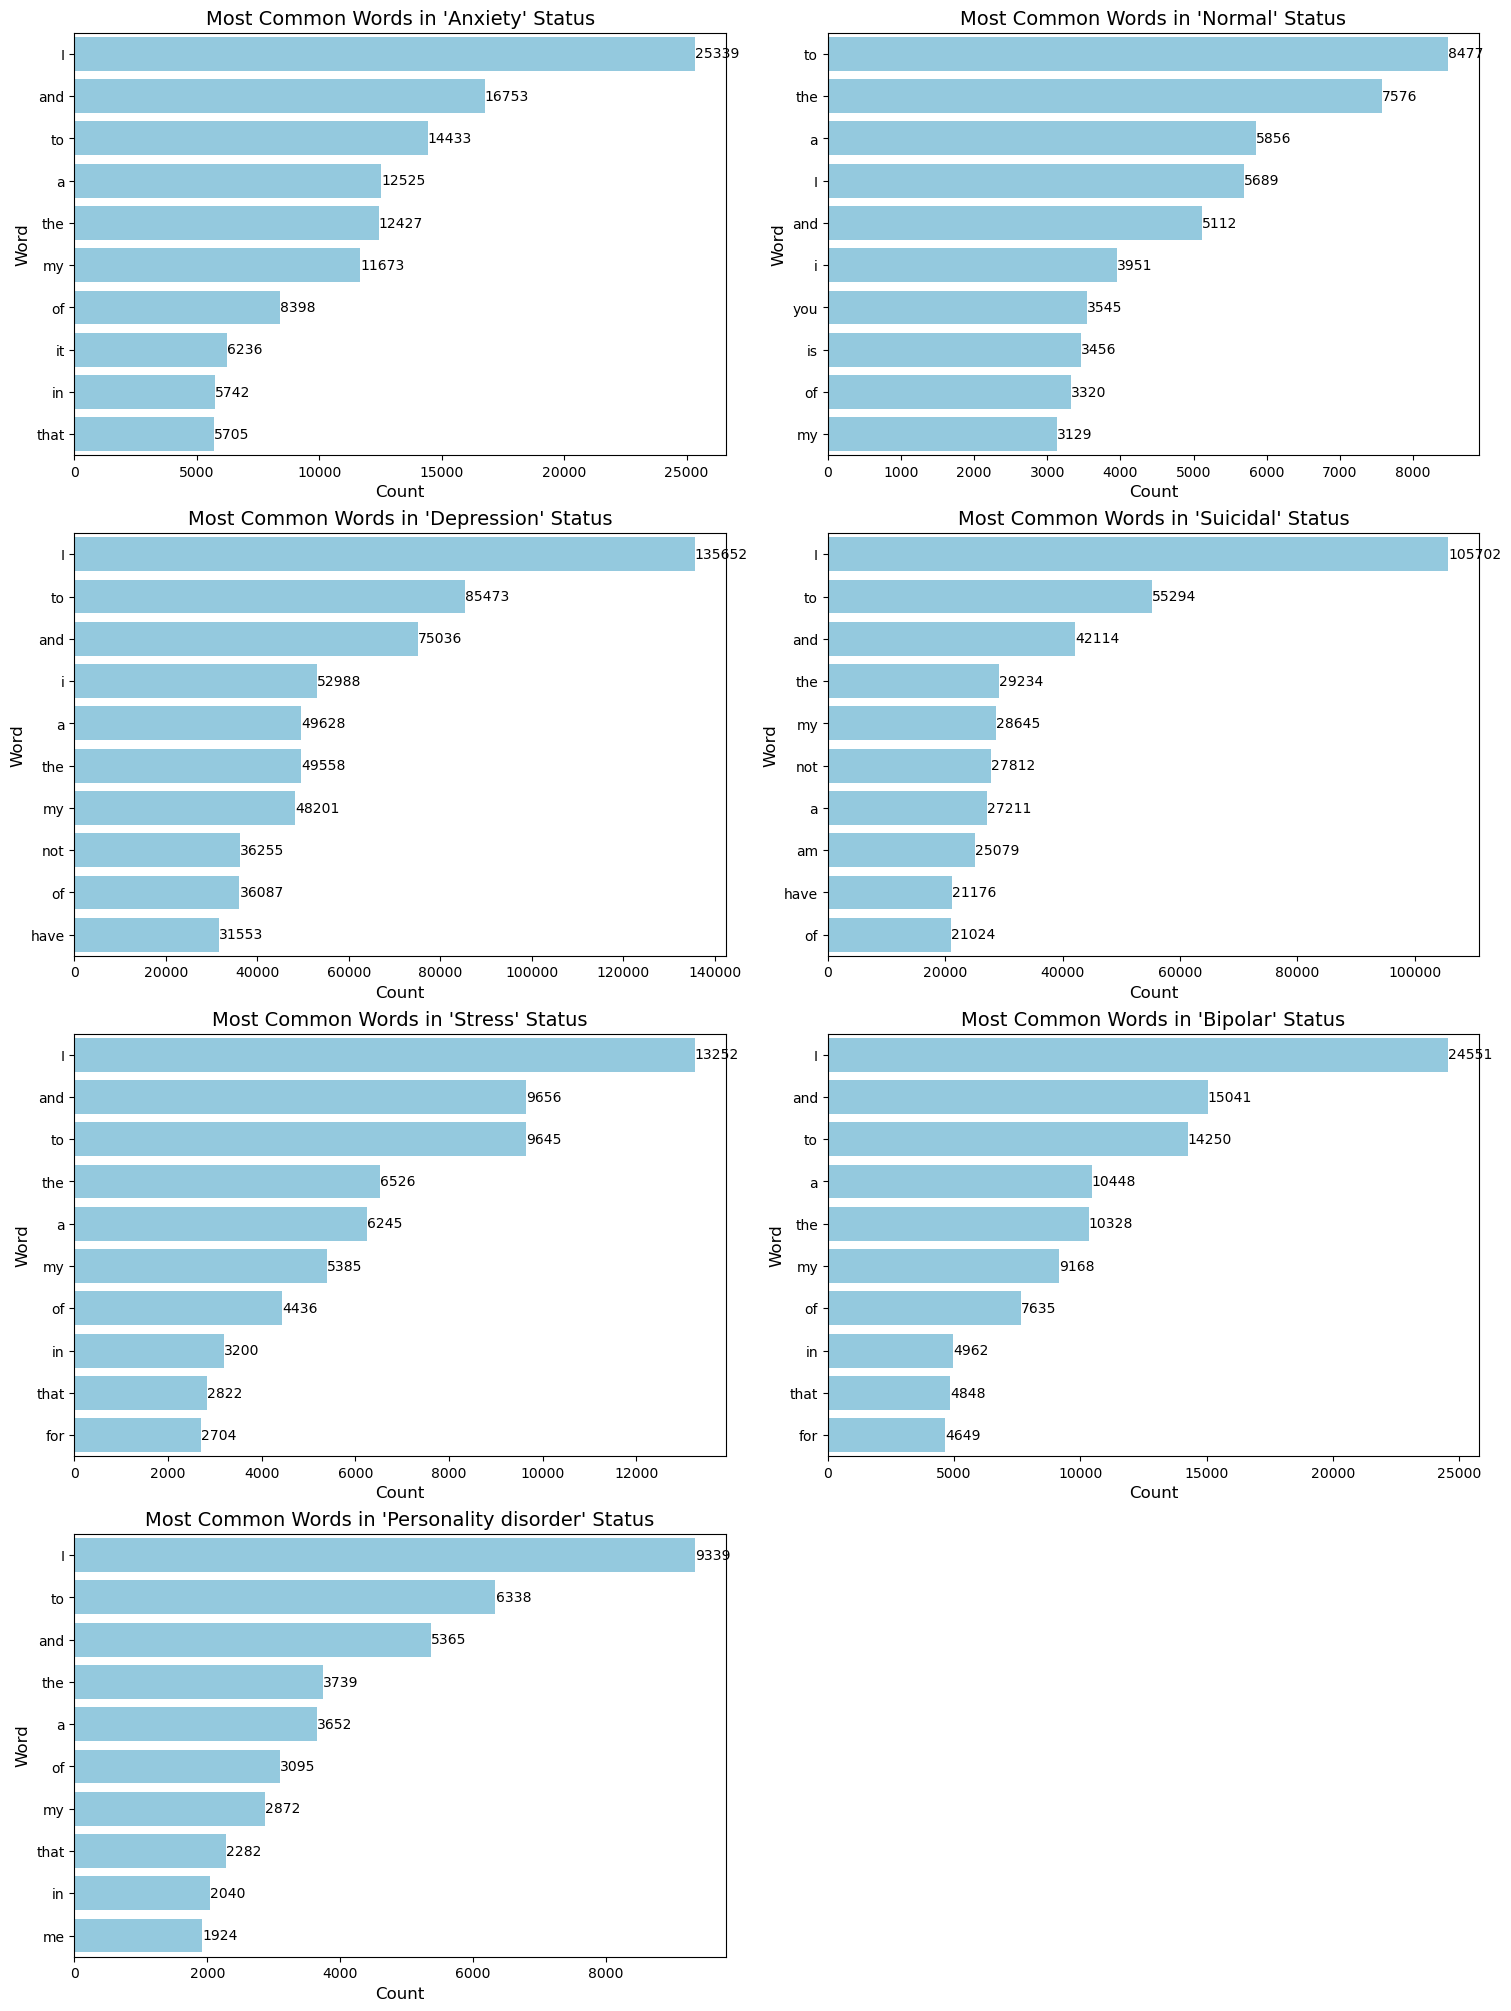

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# collect unique hits on status
status_categories = df['status'].unique()

# used to get most common words for a given status
def get_most_common_words(texts, top_n=10):
    all_words = " ".join(texts.dropna()).split()  # Drop NaN to avoid errors
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# prepare for multiple plots becasue each status will have its own plot
num_status = len(status_categories)
cols = 2
rows = (num_status + 1) // cols  # calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# flatten axes to make iteration simpler
axes = axes.flatten()

# iterate over status categories
for idx, status in enumerate(status_categories):
    # filter data for the current status
    status_data = df[df['status'] == status]
    
    # get most common words - here we focus on top 10 (top_n=10)
    most_common_words = get_most_common_words(status_data['statement'], top_n=10)
    most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
    
    # plot the stuff
    sns.barplot(data=most_common_df, x='Count', y='Word', color='skyblue', ax=axes[idx])
    axes[idx].set_title(f"Most Common Words in '{status}' Status", fontsize=14)
    axes[idx].set_xlabel("Count", fontsize=12)
    axes[idx].set_ylabel("Word", fontsize=12)
    
    # lables etc... put the count on the bars
    for bar, count in zip(axes[idx].patches, most_common_df['Count']):
        axes[idx].text(
            bar.get_width() + 1,  # Position slightly to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f"{count}",  # Add the count value
            va='center', fontsize=10
        )

# remove empty subplots if any
for idx in range(len(status_categories), len(axes)):
    fig.delaxes(axes[idx])
    
plt.show()


# Most Common Bi-Gram per Category (Pre-Filtered)

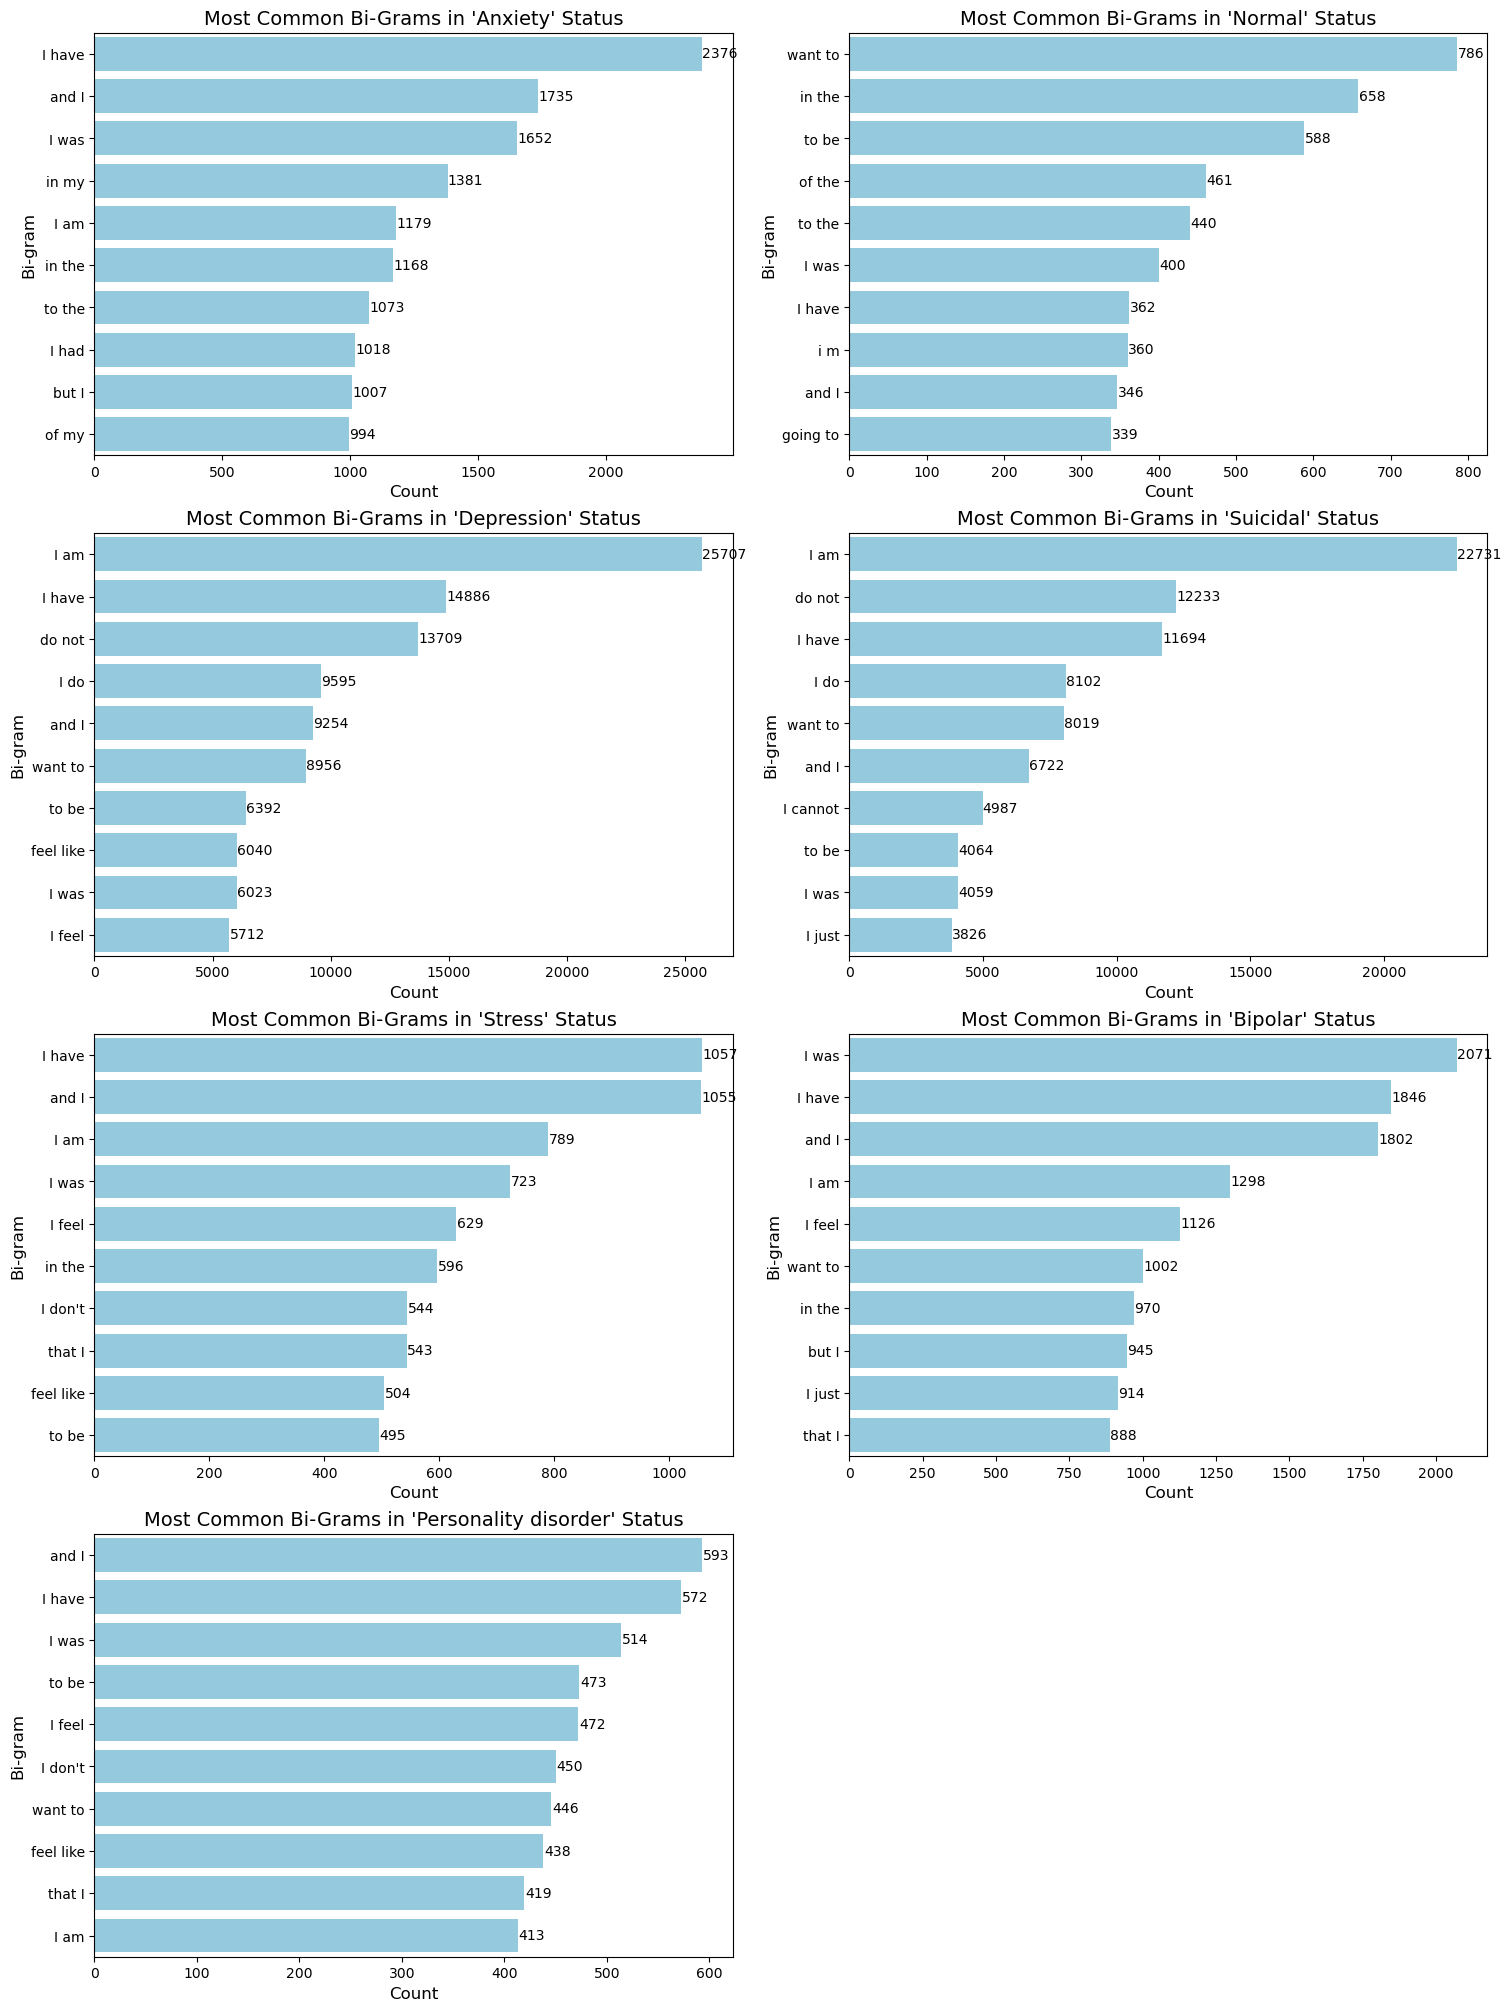

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice
import seaborn as sns

# collect unique hits on status
status_categories = df['status'].unique()

# used to get most common words for a given status
def get_most_common_bigrams(texts, top_n=10):
    all_words = " ".join(texts.dropna()).split()  # Drop NaN and split into words
    bigrams = zip(all_words, islice(all_words, 1, None))  # Create bi-grams
    bigram_counts = Counter([" ".join(bigram) for bigram in bigrams])
    return bigram_counts.most_common(top_n)

# prepare for multiple plots becasue each status will have its own plot
num_status = len(status_categories)
cols = 2
rows = (num_status + 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# flatten axes to make iteration simpler
axes = axes.flatten()

# iterate over status categories
for idx, status in enumerate(status_categories):
    # filter data for the current status
    status_data = df[df['status'] == status]
    
    # get most common bi-grams
    most_common_bigrams = get_most_common_bigrams(status_data['statement'], top_n=10)
    most_common_df = pd.DataFrame(most_common_bigrams, columns=['Bi-gram', 'Count'])
    
    # plot the data
    sns.barplot(data=most_common_df, x='Count', y='Bi-gram', color='skyblue', ax=axes[idx])
    axes[idx].set_title(f"Most Common Bi-Grams in '{status}' Status", fontsize=14)
    axes[idx].set_xlabel("Count", fontsize=12)
    axes[idx].set_ylabel("Bi-gram", fontsize=12)
    
    # label bars with counts
    for bar, count in zip(axes[idx].patches, most_common_df['Count']):
        axes[idx].text(
            bar.get_width() + 1,  # Position slightly to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f"{count}",  # Add the count value
            va='center', fontsize=10
        )

# remove empty subplots if any
for idx in range(len(status_categories), len(axes)):
    fig.delaxes(axes[idx])

plt.show()


# Most Common Tri-Gram per Category (Pre-Filtered)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice
import seaborn as sns

# collect unique hits on status
status_categories = df['status'].unique()

# function to get most common tri-grams for a given status
def get_most_common_trigrams(texts, top_n=10):
    all_words = " ".join(texts.dropna()).split()  # Drop NaN and split into words
    trigrams = zip(all_words, islice(all_words, 1, None), islice(all_words, 2, None))  # Create tri-grams
    trigram_counts = Counter([" ".join(trigram) for trigram in trigrams])
    return trigram_counts.most_common(top_n)

# prepare for multiple plots becasue each status will have its own plot
num_status = len(status_categories)
cols = 2
rows = (num_status + 1) // cols  # Calculate number of rows needed
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# flatten axes to make iteration simpler
axes = axes.flatten()

# iterate over status categories
for idx, status in enumerate(status_categories):
    # filter data for the current status
    status_data = df[df['status'] == status]
    
    # get most common tri-grams
    most_common_trigrams = get_most_common_trigrams(status_data['statement'], top_n=10)
    most_common_df = pd.DataFrame(most_common_trigrams, columns=['Tri-gram', 'Count'])
    
    # plot the data
    sns.barplot(data=most_common_df, x='Count', y='Tri-gram', color='skyblue', ax=axes[idx])
    axes[idx].set_title(f"Most Common Tri-Grams in '{status}' Status", fontsize=14)
    axes[idx].set_xlabel("Count", fontsize=12)
    axes[idx].set_ylabel("Tri-gram", fontsize=12)
    
    # label bars with counts
    for bar, count in zip(axes[idx].patches, most_common_df['Count']):
        axes[idx].text(
            bar.get_width() + 1,  # Position slightly to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f"{count}",  # Add the count value
            va='center', fontsize=10
        )

# remove empty subplots if any
for idx in range(len(status_categories), len(axes)):
    fig.delaxes(axes[idx])

plt.show()


NameError: name 'df' is not defined